In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
def k_means(X, k=3, iteration=1000):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    for _ in range(iteration):
        # Расчет расстояний между точками и центроидами
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Назначение кластеров на основе ближайшего центроида
        clusters = np.argmin(distances, axis=0)
        
        # Обновление центроидов как среднее значение точек в каждом кластере
        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
        
        # Проверка на сходимость
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        
    return clusters, centroids

In [3]:
def generate_points_inside_circle(center_x, center_y, radius, num_points):
    r = radius * np.sqrt(np.random.rand(num_points))
    theta = np.random.rand(num_points) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

In [4]:
N = 100
X = []
Y = []
for i in range(N):
    X.append(random.uniform(-10, 10))
    Y.append(random.uniform(-10, 10))
X = np.array(X)
Y = np.array(Y)
centersX = [-5, 7, 0]
centersY = [5, 2, -5]
for i in range(3):
    if i == 0:
        x1, y1 = generate_points_inside_circle(-5, 5, 7, 50)
    if i == 1:
        x2, y2 = generate_points_inside_circle(7, 2, 7, 50)
    if i == 2:
        x3, y3 = generate_points_inside_circle(0, -5, 7, 50)

noiseX = []
noiseY = []
for i in range(100):
    noiseX.append(random.uniform(-10, 10))
    noiseY.append(random.uniform(-10, 10))
        
X_tmp = np.concatenate((x1, x2, x3, noiseX), axis=0)
Y_tmp = np.concatenate((y1, y2, y3, noiseY), axis=0)
data = pd.DataFrame({"x":X_tmp,
                    "y":Y_tmp})

In [5]:
pointsForKmeans = data.copy()
pointsForHier = data.copy()
data.head()

,x,y
0,-4.291654,-1.137924
1,-9.694663,4.199592
2,-4.642262,1.088556
3,-3.993506,7.515276
4,-0.930992,10.408777


In [6]:
pointsForKmeans.head()


,x,y
0,-4.291654,-1.137924
1,-9.694663,4.199592
2,-4.642262,1.088556
3,-3.993506,7.515276
4,-0.930992,10.408777


In [7]:
pointsForHier.head()


,x,y
0,-4.291654,-1.137924
1,-9.694663,4.199592
2,-4.642262,1.088556
3,-3.993506,7.515276
4,-0.930992,10.408777


In [8]:
k =4

In [9]:
cluster_num, center = k_means(X = pointsForKmeans.values, k = k, iteration = 1000)

In [10]:
data["clusterKmeans"] = cluster_num

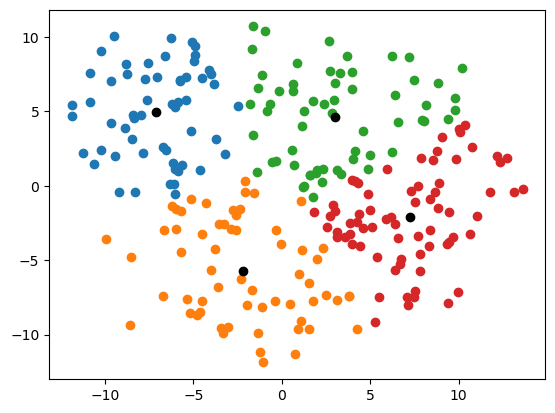

In [11]:
for i in range(k):
    plt.scatter(data[data["clusterKmeans"]==i]["x"], data[data["clusterKmeans"]==i]["y"])
    plt.scatter(center[i][0], center[i][1], color="black")

In [12]:
data.head()

,x,y,clusterKmeans
0,-4.291654,-1.137924,1
1,-9.694663,4.199592,0
2,-4.642262,1.088556,0
3,-3.993506,7.515276,0
4,-0.930992,10.408777,2


In [13]:
def ward_distance(U, V):
    return np.linalg.norm(U.mean(axis=0) - V.mean(axis=0))**2

# Функция для иерархической кластеризации
def hierarchical_clustering(points, num_clusters):
    # Преобразуем DataFrame в массив numpy
    points = points.values

    # Инициализируем кластеры
    clusters = [{i} for i in range(len(points))]
    distances = {}

    def calc_distance_matrix():
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = ward_distance(points[list(clusters[i])], points[list(clusters[j])])
                distances[(i, j)] = dist

    calc_distance_matrix()

    while len(clusters) > num_clusters:
        # Найти два ближайших кластера
        i, j = min(distances, key=distances.get)
        
        # Объединить их в новый кластер
        new_cluster = clusters[i].union(clusters[j])
        
        # Обновить список кластеров
        clusters = [clusters[k] for k in range(len(clusters)) if k != i and k != j]
        clusters.append(new_cluster)
        
        # Пересчитать расстояния
        distances = {}
        calc_distance_matrix()

    cluster_labels = np.zeros(len(points), dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            cluster_labels[index] = cluster_id

    return cluster_labels


In [14]:
cluster_labels = hierarchical_clustering(pointsForHier, k)

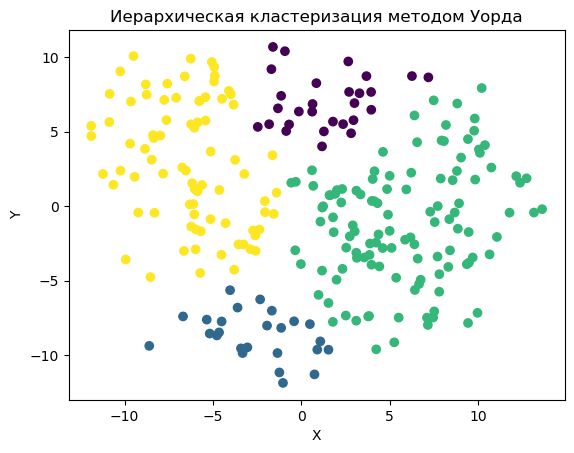

In [15]:
plt.scatter(pointsForHier["x"], pointsForHier["y"], c=cluster_labels, cmap='viridis')
plt.title('Иерархическая кластеризация методом Уорда')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()